# Stock Data Analysis Project

This notebook performs an analysis of stock price data to understand price trends and return distributions. The analysis includes:

- Loading and preprocessing stock price data from CSV
- Extracting time-based features from the dates
- Calculating monthly returns for different stocks
- Visualizing stock price trends over time
- Analyzing return distributions through histograms

The project demonstrates basic financial data analysis techniques using pandas for data manipulation and matplotlib for visualization.

## First steps

- first we need to import pandas and load the dataset

In [1]:
import pandas as pd

df = pd.read_csv("sample_stock_data.csv")
df["Date"] = pd.to_datetime(df["Date"])
df["month"] = df["Date"].dt.month
print(df.head())

        Date        AAPL         MSFT         TSLA  month
0 2024-01-31  152.483571   280.967849  2787.912443      1
1 2024-02-29  301.792249   553.314728  1395.665399      2
2 2024-03-31  455.030692   826.415057  2084.155463      3
3 2024-04-30  612.645841  1104.165907   694.556173      4
4 2024-05-31  761.475074  1380.114582  3481.906056      5


In [5]:
stocks = list(df.columns)
print(stocks)

stocks.remove("Date")
stocks.remove("month")

print(stocks)

['Date', 'AAPL', 'MSFT', 'TSLA', 'month']
['AAPL', 'MSFT', 'TSLA']


In [7]:
monthly_returns = pd.DataFrame()
monthly_returns["month"] = df["month"]

for stock in stocks:
    monthly_returns[stock] = df[stock].pct_change()
    monthly_returns[stock] = monthly_returns[stock].round(4)

monthly_returns = monthly_returns.dropna()
print(monthly_returns.head())

   month    AAPL    MSFT    TSLA
1      2  0.9792  0.9693 -0.4994
2      3  0.5078  0.4936  0.4933
3      4  0.3464  0.3361 -0.6667
4      5  0.2429  0.2499  4.0131
5      6  0.7987  0.2038  0.2002


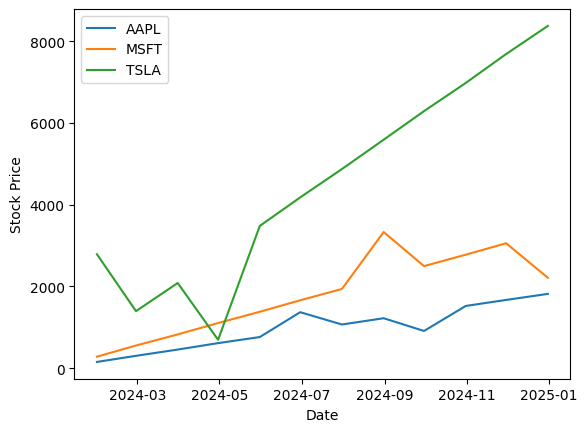

In [8]:
import matplotlib.pyplot as plt

for s in stocks:
    plt.plot(df["Date"], df[s], label=s)
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

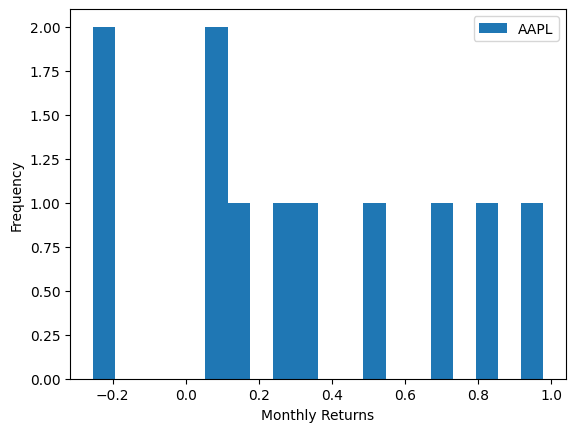

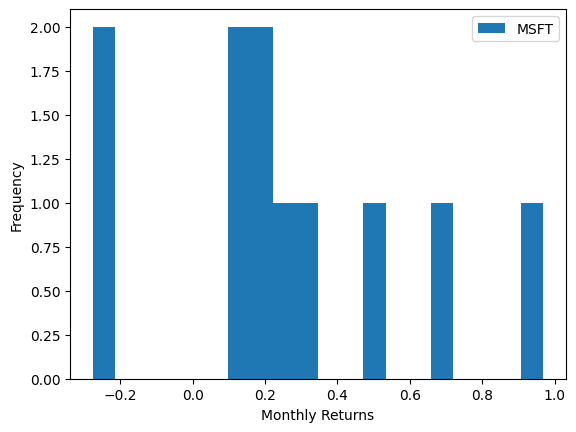

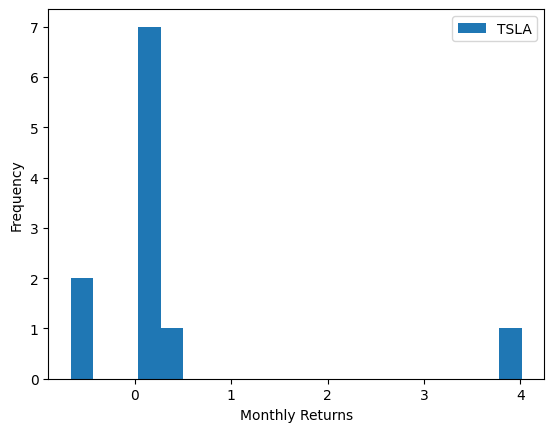

In [9]:
for stock in stocks:
    plt.hist(monthly_returns[stock], bins=20, label=stock)
    plt.xlabel("Monthly Returns")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()